In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [77]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=['SL', 'SW', 'PL', 'PW'])
data.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Разобьем данные о лепестках на два кластера

In [78]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(data)
clusters = kmeans.labels_
data.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


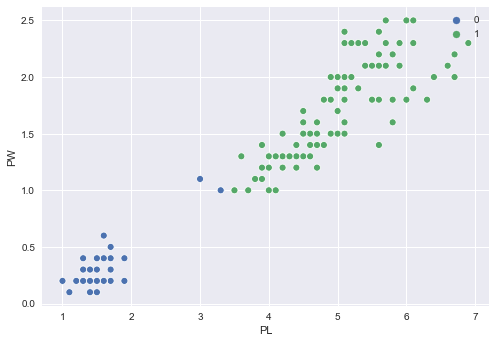

In [79]:
sns.scatterplot(data['PL'], data['PW'], clusters);

In [127]:
class LogReg:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def fit(self, X, y):
        X = self.add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = 1 / (1 + np.exp(-z))
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return 1 / (1 + np.exp(-1 * np.dot(X, self.theta)))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [128]:
model = LogReg(lr=0.1, num_iter=300000)

In [129]:
X = iris.data[:, 2:4]
y = (iris.target != 0)

In [130]:
model.fit(X, y)
prediction = model.predict(X)

In [131]:
model.theta

array([-17.29313499,   4.83314972,   7.14334359])

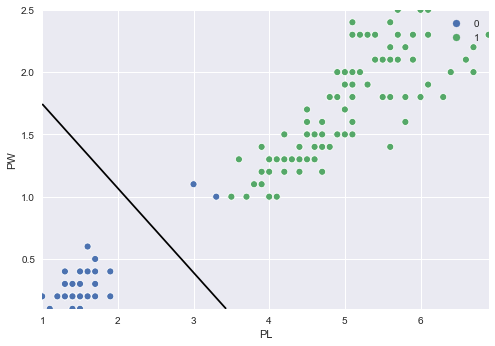

In [132]:
sns.scatterplot(data['PL'], data['PW'], clusters);
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probability = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probability, [0.5], colors='black');